In [2]:
!pip freeze > requirements.txt

## OpenAI Gym
Creating the Gym environment and simulating a few basic environments for the first time

In [3]:
import gym
from pprint import pprint                           # For nicer array printing
import time                                         # To see updates more slowly

### Space Invaders

In [3]:
env = gym.make('SpaceInvaders-v0')
env.reset()
env.render()

True

In [4]:
action = env.action_space.sample()                          # Takes a random action in the sample space
new_space, reward, is_done, info = env.step(action)         # Implements action in environment
print(is_done, info)
env.render()

False {'ale.lives': 3}


True

In [5]:
count, state = 0, 0
while not is_done:                                          # Loop until game ends
    action = env.action_space.sample()                       
    new_space, reward, is_done, info = env.step(action)
    if (count % 20 == 0 or state != info['ale.lives']):
        print(info)
        state = info['ale.lives']
    count += 1
    env.render()
print(count)

{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 2}
{'ale.lives': 2}
{'ale.lives': 2}
{'ale.lives': 2}
{'ale.lives': 2}
{'ale.lives': 2}
{'ale.lives': 1}
{'ale.lives': 1}
{'ale.lives': 1}
{'ale.lives': 1}
{'ale.lives': 1}
{'ale.lives': 1}
{'ale.lives': 0}
388


In [5]:
arr = []
for method in dir(env):
    if "__" not in method:
        arr.append(method)
pprint(arr, compact=True)

['_elapsed_steps', '_max_episode_steps', 'action_space', 'class_name', 'close',
 'compute_reward', 'env', 'metadata', 'observation_space', 'render', 'reset',
 'reward_range', 'seed', 'spec', 'step', 'unwrapped']


In [6]:
env.close()

In [9]:
"""
6 possible actions denoted by 0: No Action, 1: Fire, 2-5: Movement directions
"""
print(env.action_space)   
"""
new_space: Environment. shape attribute represents the 210x160x3 RGB image
"""
print(new_space.shape)

Discrete(6)
(210, 160, 3)


### Lunar Lander

In [12]:
# !conda install swig
# !pip install box2d
# !pip install gym[box2d]

In [7]:
env = gym.make("LunarLander-v2")
env.reset()
env.render()

action = env.action_space.sample()                          # Takes a random action in the sample space
new_space, reward, is_done, info = env.step(action)         # Implements action in environment
print(is_done, info)
while not is_done:                                          # Loop until game ends
    action = env.action_space.sample()                       
    new_space, reward, is_done, info = env.step(action)
    env.render()
    time.sleep(0.01)

False {}


In [8]:
env.close()

### CartPole

In [3]:
# video_dir = './cartpole_video/'                       # Will work in Ubuntu/Mac environments, but not Windows 
env = gym.make("CartPole-v0")
# env = gym.wrappers.Monitor(env, video_dir)
env.reset()
env.render()

True

In [4]:
is_done = False
while not is_done:
    action = env.action_space.sample()
    new_space, reward, is_done, info = env.step(action)
    print(new_space)                                     # [Cart position, Cart velocity, Pole angle {-0.209, 0.209}, Pole velocity]
    time.sleep(0.5)
    env.render()

[-0.04220357 -0.16393398 -0.01566548  0.30263417]
[-0.04548225 -0.3588292  -0.0096128   0.59033567]
[-0.05265883 -0.55381525  0.00219392  0.87997511]
[-0.06373514 -0.74896694  0.01979342  1.17334695]
[-0.07871448 -0.9443405   0.04326036  1.47216877]
[-0.09760129 -1.13996388  0.07270373  1.77804389]
[-0.12040056 -1.33582518  0.10826461  2.09241577]
[-0.14711707 -1.14194788  0.15011293  1.83507018]
[-0.16995603 -1.3383777   0.18681433  2.17036903]
[-0.19672358 -1.14550632  0.23022171  1.94070014]


In [9]:
num_episodes = 1000
total_rewards = []
for episode in range(num_episodes):
    state = env.reset()
    r_total = 0
    is_done = False
    while not is_done:
        action = env.action_space.sample()
        new_s, reward, is_done, _ = env.step(action)
        r_total += reward
    total_rewards.append(r_total)
print("Average reward: ", sum(total_rewards)/1000)  

Average reward:  22.485


In [ ]:
env.close()

## Learner: Random Search Policy
Randomly generates weight matrices to iteratively search through the policy space to find the best one -> highest reward. 

In [55]:
import torch
import gym
import matplotlib.pyplot as plt

In [41]:
env = gym.make("CartPole-v0")

In [42]:
num_states = env.observation_space.shape[0]  
num_actions = env.action_space.n            
print((num_states, num_actions))

(4, 2)


In [43]:
def run_episode(env, weight):
    state = env.reset()
    total_reward = 0
    is_done = False
    # _ = True
    while not is_done:
        state = torch.from_numpy(state).float()                         # For matrix multiplication
        action = torch.argmax(torch.matmul(state, weight))            
        # Index with highest value from 1x2 matrix is selected
        state, reward, is_done, info = env.step(action.item())
        # if _:
        #     print(state, "\n", action, "\n", torch.matmul(torch.from_numpy(state).float(), weight))
        #     _ = False
        total_reward += reward
    return total_reward

In [44]:
num_episodes = 1000
best_reward = 0
best_weight = None
total_rewards = []

for episode in range(num_episodes):
    weight = torch.rand(num_states, num_actions)
    reward = run_episode(env, weight)
    if episode % 20 == 19 or reward > best_reward:
        print(f"Episode: {episode + 1} \t Total reward: {reward}")
    if reward > best_reward:
        best_reward = reward
        best_weight = weight
    total_rewards.append(reward)


Episode: 1 	 Total reward: 61.0
Episode: 4 	 Total reward: 200.0
Episode: 20 	 Total reward: 49.0
Episode: 40 	 Total reward: 70.0
Episode: 60 	 Total reward: 9.0
Episode: 80 	 Total reward: 37.0
Episode: 100 	 Total reward: 8.0
Episode: 120 	 Total reward: 9.0
Episode: 140 	 Total reward: 34.0
Episode: 160 	 Total reward: 8.0
Episode: 180 	 Total reward: 98.0
Episode: 200 	 Total reward: 9.0
Episode: 220 	 Total reward: 9.0
Episode: 240 	 Total reward: 9.0
Episode: 260 	 Total reward: 159.0
Episode: 280 	 Total reward: 45.0
Episode: 300 	 Total reward: 9.0
Episode: 320 	 Total reward: 9.0
Episode: 340 	 Total reward: 10.0
Episode: 360 	 Total reward: 9.0
Episode: 380 	 Total reward: 129.0
Episode: 400 	 Total reward: 200.0
Episode: 420 	 Total reward: 49.0
Episode: 440 	 Total reward: 8.0
Episode: 460 	 Total reward: 200.0
Episode: 480 	 Total reward: 9.0
Episode: 500 	 Total reward: 9.0
Episode: 520 	 Total reward: 200.0
Episode: 540 	 Total reward: 31.0
Episode: 560 	 Total reward: 

In [45]:
print(f"Average reward, {num_episodes} iterations: {sum(total_rewards) / num_episodes}")
eval_run(env, best_weight)

Average reward, 1000 iterations: 48.42
Average reward, 100 iterations: 158.86


Expected number of iterations before best reward is reached: 13

In [46]:
def eval_run(env, best_weight):
    eval_num_episodes = 100
    eval_total_rewards = []
    for episode in range(eval_num_episodes):
        reward = run_episode(env, best_weight)
        eval_total_rewards.append(reward)  
    print(f"Average reward, {eval_num_episodes} evaluation iterations:", 
    f"{sum(eval_total_rewards) / eval_num_episodes}")

In [47]:
# !pip install matplotlib

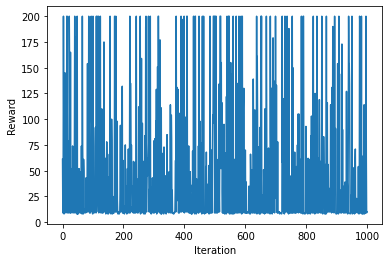

In [48]:
plt.plot(total_rewards)
plt.xlabel("Iteration")
plt.ylabel("Reward")
plt.show()

## Learner: Hill-Climb/ Gradient Descent
Start with a randomly generated weight. Update it after each iteration with randomly generated noise. If updated weight improves reward continue, else keep previous weight for next iteration.
Run previous code blocks for initialization.

In [49]:
num_episodes = 1000
best_reward = 0
best_weight = torch.rand(num_states, num_actions)              # Change 1
total_rewards = []

eta = 0.01              # Noise scaling parameter
for episode in range(num_episodes):
    weight = best_weight + torch.rand(num_states, num_actions) * eta         # Change 2
    reward = run_episode(env, weight)
    if episode % 20 == 19 or reward > best_reward:
        print(f"Episode: {episode + 1} \t Total reward: {reward}")
    if reward > best_reward:
        best_reward = reward
        best_weight = weight
    total_rewards.append(reward)


Episode: 1 	 Total reward: 33.0
Episode: 2 	 Total reward: 49.0
Episode: 4 	 Total reward: 54.0
Episode: 8 	 Total reward: 59.0
Episode: 20 	 Total reward: 44.0
Episode: 23 	 Total reward: 77.0
Episode: 40 	 Total reward: 27.0
Episode: 60 	 Total reward: 45.0
Episode: 80 	 Total reward: 29.0
Episode: 100 	 Total reward: 32.0
Episode: 111 	 Total reward: 81.0
Episode: 120 	 Total reward: 28.0
Episode: 125 	 Total reward: 89.0
Episode: 140 	 Total reward: 47.0
Episode: 160 	 Total reward: 38.0
Episode: 180 	 Total reward: 38.0
Episode: 200 	 Total reward: 30.0
Episode: 220 	 Total reward: 48.0
Episode: 240 	 Total reward: 29.0
Episode: 260 	 Total reward: 39.0
Episode: 280 	 Total reward: 43.0
Episode: 300 	 Total reward: 27.0
Episode: 320 	 Total reward: 50.0
Episode: 340 	 Total reward: 30.0
Episode: 360 	 Total reward: 37.0
Episode: 380 	 Total reward: 33.0
Episode: 395 	 Total reward: 109.0
Episode: 400 	 Total reward: 39.0
Episode: 420 	 Total reward: 46.0
Episode: 440 	 Total rewar

In [50]:
print(f"Average reward {num_episodes} iterations: {sum(total_rewards) / num_episodes}")

Average reward 1000 iterations: 38.952


Poor performance due to extreme dependence on starting weights. Learning rate has to be made adaptive.

In [51]:
num_episodes = 1000
best_reward = 0
best_weight = torch.rand(num_states, num_actions)     
total_rewards = []

eta = 0.01              # Noise parameter
scale = 2              # Noise step parameter
for episode in range(num_episodes):
    weight = best_weight + torch.rand(num_states, num_actions) * eta         # Change 2
    reward = run_episode(env, weight)
    if episode % 20 == 19 or reward > best_reward:
        print(f"Episode: {episode + 1} \t Total reward: {reward}")
    if reward >= best_reward:
        best_reward = reward
        best_weight = weight
        eta = max(eta / scale, 1e-4)
    else:
        eta = min(eta * scale, scale)
    total_rewards.append(reward)


Episode: 1 	 Total reward: 44.0
Episode: 2 	 Total reward: 68.0
Episode: 3 	 Total reward: 81.0
Episode: 6 	 Total reward: 99.0
Episode: 15 	 Total reward: 119.0
Episode: 20 	 Total reward: 11.0
Episode: 36 	 Total reward: 161.0
Episode: 39 	 Total reward: 200.0
Episode: 40 	 Total reward: 173.0
Episode: 60 	 Total reward: 176.0
Episode: 80 	 Total reward: 177.0
Episode: 100 	 Total reward: 200.0
Episode: 120 	 Total reward: 200.0
Episode: 140 	 Total reward: 200.0
Episode: 160 	 Total reward: 199.0
Episode: 180 	 Total reward: 200.0
Episode: 200 	 Total reward: 185.0
Episode: 220 	 Total reward: 200.0
Episode: 240 	 Total reward: 200.0
Episode: 260 	 Total reward: 200.0
Episode: 280 	 Total reward: 200.0
Episode: 300 	 Total reward: 200.0
Episode: 320 	 Total reward: 200.0
Episode: 340 	 Total reward: 200.0
Episode: 360 	 Total reward: 200.0
Episode: 380 	 Total reward: 200.0
Episode: 400 	 Total reward: 197.0
Episode: 420 	 Total reward: 200.0
Episode: 440 	 Total reward: 200.0
Episo

In [52]:
print(f"Average reward {num_episodes} iterations: {sum(total_rewards) / num_episodes}")
eval_run(env, best_weight)

Average reward 1000 iterations: 192.451
Average reward, 100 iterations: 198.6


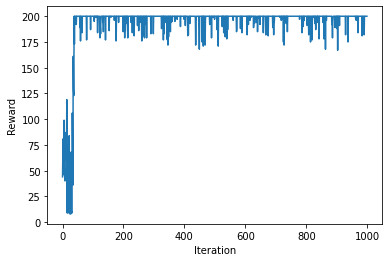

In [53]:
plt.plot(total_rewards)
plt.xlabel("Iteration")
plt.ylabel("Reward")
plt.show()

## Learner: Policy Gradients
Model weights move in direction of the gradient (Similar to what happens in neural networks)

In [69]:
import torch.nn as nn

def run_episode(env, weight):
    state = env.reset()
    grads = []
    reward = 0
    is_done = False
    softmax = nn.Softmax(dim=0)
    while not is_done:
        state = torch.from_numpy(state).float()
        z = torch.matmul(state, weight)
        proba = softmax(z)
        print(z, proba)
        # action = 
        is_done = True

In [81]:
run_episode(env, torch.rand(num_states, num_actions))

tensor([-0.0006,  0.0234]) tensor([0.4940, 0.5060])
